In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("../dsi-us-11-project-2-regression-challenge/train.csv")

In [6]:
data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [16]:
data.shape

(2051, 81)

In [40]:
print(data.isna().sum().sum())

9822


In [59]:
pd.options.display.max_rows = 100
print(data.isna().sum())

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [31]:
data['Lot Frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
118.0      1
137.0      1
195.0      1
115.0      1
135.0      1
Name: Lot Frontage, Length: 118, dtype: int64

In [15]:
data['Alley'].value_counts()

# Only 140 rows out of 2051 rows have a non-NA value

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [33]:
data['Pool Area'].value_counts()

# Only 9 houses out of 2051 houses have pools

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: Pool Area, dtype: int64

In [34]:
data['Fence'].value_counts()

# 400 out of 2051 houses have fences, but based on the description of the values, there may be overlaps of Good wood (GW) and 
# Minimum Wood/Wire (MnWw) [is this min quality or materials that will make it ugly?] in the Good or Minimum privacy

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [35]:
data['Misc Feature'].value_counts()

# 65 out of 2051 have special features on top of those in the other columns

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [36]:
data['Misc Val'].value_counts()

# Indeed have 65, and each of the 65 houses with special features have a recorded value BUT some have very low values

0        1986
400        12
500         8
600         6
450         5
2000        5
700         4
1200        2
3000        2
2500        2
4500        2
17000       1
1300        1
900         1
1500        1
800         1
6500        1
54          1
3500        1
1150        1
300         1
455         1
8300        1
460         1
12500       1
480         1
650         1
80          1
Name: Misc Val, dtype: int64

In [43]:
data['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

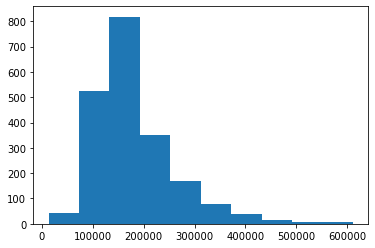

In [45]:
plt.hist(data['SalePrice'])
plt.show()

In [53]:
pool_data = data[data['Pool Area']!=0]
pool_data.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
52,2351,527356020,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,...,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,250000
657,1567,914475020,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,...,0,576,Gd,GdPrv,NaN,0,7,2008,WD,171000
761,2499,532476050,80,RL,100.0,14330,Pave,NaN,IR1,Low,...,0,800,Gd,GdPrv,NaN,0,1,2006,WD,260000
952,2231,909475230,20,RL,70.0,18044,Pave,NaN,IR1,HLS,...,0,228,Ex,NaN,NaN,0,8,2007,WD,315000
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1130,2358,527377030,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,...,0,648,Fa,GdPrv,NaN,0,1,2006,WD,181000
1249,2736,905426150,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,...,0,738,Gd,GdPrv,NaN,0,8,2006,WD,274970
1635,1941,535353050,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,...,0,368,TA,GdPrv,NaN,0,2,2007,WD,153000
1875,2279,923202220,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,...,0,561,TA,GdPrv,NaN,0,6,2007,WD,130000


In [55]:
data['SalePrice'].corr(pool_data['Pool Area'])

# VERY BAD!

-0.012805581888135126

In [ ]:
mapping = {'FA': 1, 'TA': 2, 'Fa': 3, 'Ex':4}
data.replace()

In [61]:
data['Pool QC'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64